# Matching

- This is a concept that involves finding two or more pieces of data that are same.

- This can be dne by looking at the values of data or looking at the relationship between data.

- Imagine you have a box of toys. You want to find all of the pairs of matching toys.

- You can do this by matching the toys by their color, size, or shape. For example, you could find all of the red toys, or all of the big toys, or all of the round toys.

- Once you have found all of the matching toys, you can put them away in pairs.

# Case Study: Are Catholic Schools Better?

In [1]:
!pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 998.2 kB/s eta 0:00:00


In [2]:
# Loading the directory
%cd /content/drive/MyDrive/Business Analyst Workbooks/Matching

/content/drive/MyDrive/Business Analyst Workbooks/Matching


In [3]:
# Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [4]:
# Get Data
df = pd.read_csv("school.csv")

In [5]:
df.head()

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0001010C,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,0001011C,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0001012C,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


In [6]:
# Drop the unecessary data
df = df.iloc[:,1:]
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


# Unconfoundedness

- Imagine you have two groups of toys: one group of red toys, and one group of blue toys. You want to know if being red makes a toy more fun to play with.

- To find out, you could look at how much fun children have playing with red toys versus blue toys. But there is a problem: some toys might be more fun to play with for other reasons, such as because they are shaped like a dinosaur or because they make a noise.

- To solve this problem, you need to make sure that the two groups of toys are similar in all other ways, except for their color. This is called unconfoundedness.

- One way to make sure that the two groups of toys are unconfounded is to match them. This means finding two toys that are similar in all other ways, except for their color. You can match the toys by looking at their size, shape, and other factors.

- Once you have matched the toys, you can compare how much fun children have playing with them. If the red toys are more fun to play with than the blue toys, then you can conclude that being red makes a toy more fun to play with.

- Unconfoundedness is an important concept in data analytics. It allows us to draw causal conclusions from data. This means that we can learn about the causes and effects of things.


# Data Analysis

- With the help of groupby function we need to group the functions through which they are catholic or not and the mean of all features are determined using mean function.

In [7]:
# Comparing Group Avg's
df.groupby('catholic').mean()

<ipython-input-7-c7c30d618864>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('catholic').mean()


,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [8]:
 # T-Test (Done for Continuous Variables)
group1 = df.where(df.catholic == 0).dropna()["income"] # Non-Catholic
group2 = df.where(df.catholic == 1).dropna()["income"] # Catholic
group2.head()

3      87500.5
21    150000.5
22     87500.5
23    150000.5
24    150000.5
Name: income, dtype: float64

In [9]:
stat, p = ss.ttest_ind(group1,group2)
print(p)

5.943636213205364e-41


- We will be creating a loop that will check all the entries and find out the p-value of the variable.

In [10]:
# What to look
continuous = ["number_places_lived", "mom_age", "dad_age", "mom_score", "dad_score", "income"]
# Where to store the result
stat = {}
p = {}
# Loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x] # Non-Catholic
  group2 = df.where(df.catholic == 1).dropna()[x] # Catholic
  stat[x], p[x] = ss.ttest_ind(group1,group2)
ttests = pd.DataFrame.from_dict(p, orient="Index")
ttests.columns = ['pvalue']
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


- We have studied our continuous variables and the p-value concludes that these can undergo matching process.|

- We will do Chi-Square test do determine the relationship between binary variables.

In [11]:
# Chi-Square Test
tab = pd.crosstab(index = df.poverty,
                  columns = df.catholic)
tab

catholic,0,1
poverty,,
0,4042,915
1,457,15


In [12]:
statistic, p, dof, exp = ss.chi2_contingency(tab)
p

6.511354893726035e-17

- We will create a loop for chi square values too.

In [13]:
from pandas.core.arrays.categorical import CategoricalT
# What to loop
categorical = ["poverty", "food_stamps"]
# Where to Store
statistic = {}
p = {}
dof = {}
exp = {}
# Loop
for x in categorical:
  tab = pd.crosstab(index = df[x],
                  columns = df.catholic)
  statistic[x], p[x], dof[x], exp[x] = ss.chi2_contingency(tab)
chisquare = pd.DataFrame.from_dict(p, orient = "Index")
chisquare.columns = ["pvalue"]
print(chisquare)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


- The p-values are very low so there is strong relation between binary variables too.

# Matching Preparation

In [14]:
temp = pd.get_dummies(df)
temp.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,...,dad_education_VOC/TECH PROGRAM,mom_education_8TH GRADE OR BELOW,mom_education_9TH - 12TH GRADE,mom_education_BACHELOR'S DEGREE,mom_education_DOCTORATE OR PROFESSIONAL DEGREE,mom_education_GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,mom_education_HIGH SCHOOL DIPLOMA/EQUIVALENT,"mom_education_MASTER'S DEGREE (MA, MS)",mom_education_SOME COLLEGE,mom_education_VOC/TECH PROGRAM
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,...,0,0,0,0,0,0,0,0,1,0


In [15]:
print(temp.columns)

Index(['catholic', 'number_places_lived', 'mom_age', 'dad_age', 'mom_score',
       'dad_score', 'income', 'poverty', 'food_stamps', 'score_standardized',
       'race_AMERICAN INDIAN OR ALASKA NATIVE', 'race_ASIAN',
       'race_BLACK OR AFRICAN AMERICAN, NON-HISPANIC',
       'race_HISPANIC, RACE NOT SPECIFIED', 'race_HISPANIC, RACE SPECIFIED',
       'race_MORE THAN ONE RACE, NON HISPANIC',
       'race_NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER', 'race_NOT ASCERTAINED',
       'race_WHITE, NON-HISPANIC', 'dad_education_8TH GRADE OR BELOW',
       'dad_education_9TH - 12TH GRADE', 'dad_education_BACHELOR'S DEGREE',
       'dad_education_DOCTORATE OR PROFESSIONAL DEGREE',
       'dad_education_GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE',
       'dad_education_HIGH SCHOOL DIPLOMA/EQUIVALENT',
       'dad_education_MASTER'S DEGREE (MA, MS)', 'dad_education_SOME COLLEGE',
       'dad_education_VOC/TECH PROGRAM', 'mom_education_8TH GRADE OR BELOW',
       'mom_education_9TH - 12TH GRADE', 'mom_

# Curse of Dimensionality

- We need to keep the model as simple as possible, let'say you have a variable with three options and another variable with 3 more options, this leads to exponential observations so this leads to artificial and complicated outcomes.

In [16]:
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

- As this is very complicated, we need to see to simplify,

- Consider White race, Group Hispanic, consider Black or African American and Asian. Then, exclude the rest from the list.

In [17]:
# Preparing Race Variable with if else condition
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |
                                 (df.race == 'HISPANIC, RACE SPECIFIED' ), 1, 0)
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,0,1,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,0,1,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,0,1,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,0,1,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,0,1,0,0


In [18]:
# Preparing Education Variable
df.dad_education.value_counts()

HIGH SCHOOL DIPLOMA/EQUIVALENT            1524
SOME COLLEGE                              1344
BACHELOR'S DEGREE                         1026
9TH - 12TH GRADE                           355
MASTER'S DEGREE (MA, MS)                   354
VOC/TECH PROGRAM                           306
DOCTORATE OR PROFESSIONAL DEGREE           224
8TH GRADE OR BELOW                         167
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     129
Name: dad_education, dtype: int64

- It is oversimplified so we reduce the dimensions.

In [19]:
# Transforming the Education Variable
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                        (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                        (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),1,0)

df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                        (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                        (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),1,0)
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [20]:
# Cleaning Dataset (Removing the text based columns)
df = df.drop(columns= ["race", "dad_education", "mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [21]:
# Isloating y, treatment and confounders
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic", "score_standardized"]).values

# Common Support Region

- Imagine you have a box of red and blue toys. You want to know if red toys are more fun to play with than blue toys.

- However, you know that some toys might be more fun to play with for other reasons, such as because they are shaped like a dinosaur or because they make a noise.

- To ensure that you are comparing two groups of toys that are similar in all other ways, except for their color, you need to create a common support region. This means finding a range of values for the covariates (i.e., the factors that can affect how fun a toy is to play with) for which there are both red and blue toys.

- For example, you might decide to only compare toys that are the same size and shape. This would create a common support region because there are both red and blue toys that are the same size and shape.

- Once you have created a common support region, you can compare the fun factor of the red toys to the fun factor of the blue toys. If the red toys are more fun to play with than the blue toys, then you can conclude that being red makes a toy more fun to play with.

- The common support region is an important concept in data analytics because it allows us to draw causal conclusions from our data. However, it is important to note that the common support region is not always easy to identify. In some cases, it may be necessary to use statistical methods to create a common support region.

In [22]:
# Logistic Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr)
csr_model = csr_model.fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                 0.05888
Time:                        14:51:06   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 3.835e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3412      0.418    -10.380      0.000      -5.161      -3.521
x1            -0.1666      0.

In [23]:
# Checking correlations in the confounders
df.drop(columns = ["catholic", "score_standardized"]).corr()

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
number_places_lived,1.000000,-0.105116,-0.096571,-0.042976,-0.033342,-0.039007,0.058450,0.063574,0.030205,-0.030456,-0.004143,0.016853,-0.022836,-0.045230
mom_age,-0.105116,1.000000,0.741862,0.224808,0.237727,0.276373,-0.134362,-0.106739,0.052270,0.098262,-0.060004,-0.116422,0.265912,0.281417
dad_age,-0.096571,0.741862,1.000000,0.179047,0.197057,0.222995,-0.100600,-0.083560,0.085816,0.063543,-0.039396,-0.108158,0.247213,0.213065
mom_score,-0.042976,0.224808,0.179047,1.000000,0.309380,0.361271,-0.190873,-0.111281,-0.015435,0.155196,-0.033081,-0.158292,0.324952,0.458104
dad_score,-0.033342,0.237727,0.197057,0.309380,1.000000,0.406067,-0.172984,-0.113052,0.029000,0.144808,-0.075754,-0.147734,0.467236,0.321471
income,-0.039007,0.276373,0.222995,0.361271,0.406067,1.000000,-0.369395,-0.214107,-0.005106,0.247893,-0.119058,-0.199047,0.440927,0.397905
poverty,0.058450,-0.134362,-0.100600,-0.190873,-0.172984,-0.369395,1.000000,0.387830,0.046462,-0.267137,0.092218,0.217985,-0.168300,-0.157597
food_stamps,0.063574,-0.106739,-0.083560,-0.111281,-0.113052,-0.214107,0.387830,1.000000,-0.005068,-0.150369,0.108143,0.078449,-0.105153,-0.105883
race_asian,0.030205,0.052270,0.085816,-0.015435,0.029000,-0.005106,0.046462,-0.005068,1.000000,-0.372021,-0.068790,-0.107396,0.089660,0.075650
race_white,-0.030456,0.098262,0.063543,0.155196,0.144808,0.247893,-0.267137,-0.150369,-0.372021,1.000000,-0.380653,-0.594279,0.105363,0.130682


In [24]:
# Predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [26]:
# Create dataframes with probability and being treated or not
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob) # Converting the matrix from horizontal to vertical
print(df_prob)

[[0.         0.26041384]
 [0.         0.17273291]
 [0.         0.24596599]
 ...
 [0.         0.23182116]
 [0.         0.12192314]
 [0.         0.1825144 ]]


In [29]:
# Split between treated and non treated
non_treated = df_prob[:, 0] == 0 # Go through all columns and check when it is zero
non_treated = df_prob[non_treated]
non_treated = non_treated[:,1]
non_treated

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [32]:
# Splitting the treated Group
treated = df_prob[:, 0] == 1 # Go through all columns and check when it is 1
treated = df_prob[treated]
treated = treated[:,1]
treated

array([0.19676148, 0.24729167, 0.21988676, 0.22881787, 0.32821383,
       0.25049644, 0.14491857, 0.32658179, 0.14745721, 0.24910202,
       0.27007105, 0.13935952, 0.26942894, 0.2485176 , 0.17192327,
       0.34900789, 0.14117348, 0.16843281, 0.16994461, 0.18479727,
       0.20554855, 0.20338376, 0.16510918, 0.16257248, 0.27139024,
       0.1298619 , 0.14302491, 0.2818405 , 0.25217589, 0.09827122,
       0.23889338, 0.10862887, 0.32795215, 0.17246901, 0.2241471 ,
       0.12779455, 0.19144622, 0.2164774 , 0.1352949 , 0.31622352,
       0.22874469, 0.14517065, 0.16602003, 0.13635273, 0.22874469,
       0.18668604, 0.13378686, 0.11927721, 0.26370127, 0.28861122,
       0.26979042, 0.1661017 , 0.19812266, 0.29100822, 0.28996167,
       0.30459674, 0.30161661, 0.17383041, 0.10678442, 0.26714851,
       0.25050026, 0.28217832, 0.32439961, 0.11215238, 0.15009687,
       0.20694818, 0.23290068, 0.16836401, 0.19422764, 0.29969853,
       0.33541544, 0.26692882, 0.33229699, 0.45167273, 0.23778

<ipython-input-33-aa34f96dc7d5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot_non_treated = sns.kdeplot(non_treated, shade = True, color = 'r')
<ipython-input-33-aa34f96dc7d5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot_treated = sns.kdeplot(treated, shade = True, color = 'b')


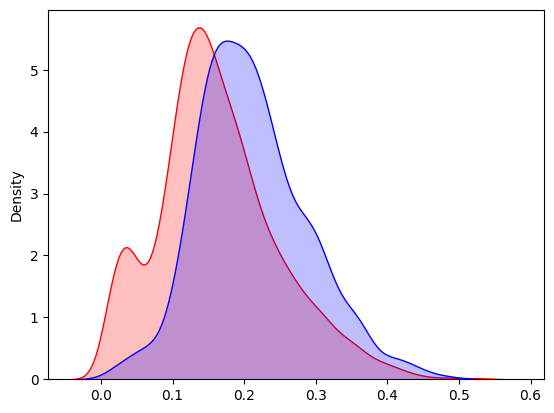

In [33]:
# Common Support Region
plot_non_treated = sns.kdeplot(non_treated, shade = True, color = 'r')
plot_treated = sns.kdeplot(treated, shade = True, color = 'b')

- Through the visualization we can see that there is a good amount of overlap between the groups so the matching is really high.

# Matching

In [34]:
# Matching Model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


- ATE is the important criteria that is used to to the matching, it is the average of the treatment group.

In [35]:
# Just get the required result (ATE) using
model.estimates['matching']['ate']

-0.13297192873363323

# Robustness: Repeated Experiment

In [ ]:
# Prepare for the loop
ate = {}
i = 0
# Start the loop
while i < 1000:
  # Sample
  sample = df.sample(1000)

  # Matching Preparation
  treat = sample.catholic.values
  confounders = sample.drop(columns = ["catholic", "score_standardized"]).values
  y = sample.score_standardized.values

  # Matching
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj = True)

  # Store the Results
  ate[i] = model.estimates['matching']['ate']
  i = i + 1

Axes(0.125,0.11;0.775x0.77)


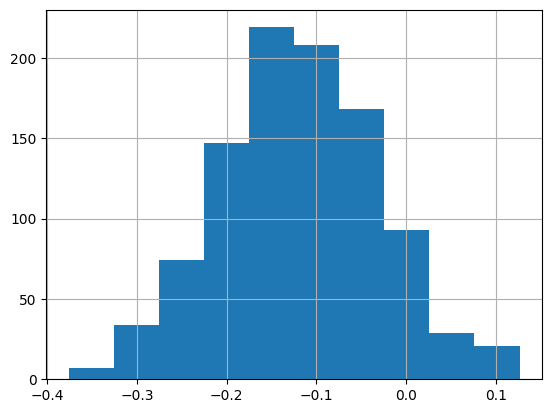

In [37]:
# Visualization
ate = pd.Series(ate)
print(ate.hist())

In [38]:
ate.mean()

-0.11905798178582179

# Robustness Check - Removing 1 confounder

In [39]:
# New Confounder list
confounder = df.drop(columns = ["catholic", "score_standardized", "income"]).values

In [40]:
# Matching
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.214      0.131     -1.638      0.101     -0.470      0.042
           ATC     -0.222      0.141     -1.576      0.115     -0.498      0.054
           ATT     -0.174      0.141     -1.241      0.214     -0.450      0.101



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
